## Import Libraries 

In [49]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

## Split Data 

In [50]:
def split_train_test_data(data, train_ratio):
    train_size = int(len(data) * train_ratio)
    train_data = data.iloc[:train_size]
    test_data = data.iloc[train_size:]
    return train_data, test_data

## Load and Process BNB Data 

In [51]:
df = pd.read_csv('BNB Historical Data.csv')
df = df.drop(columns=['Vol.', 'Change %'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')
df = df.reset_index(drop=True)

## Calculate MAPE 

In [52]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## 1. BNB Data with 7/3 split 

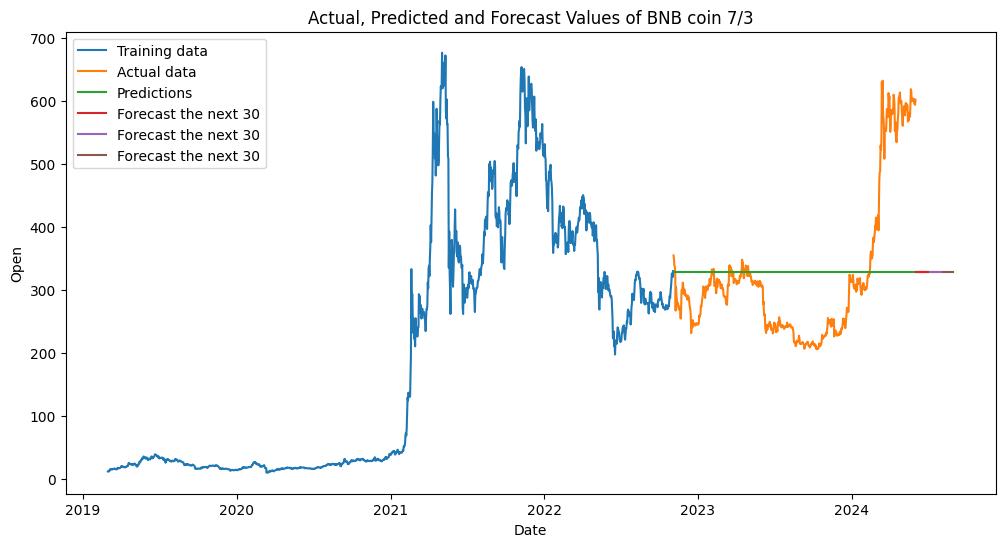

RMSE: 116.7643
MAPE: 26.36%
MSE: 13633.8981


In [53]:
train_df, test_df = split_train_test_data(df, 0.7)

model_df = SimpleExpSmoothing(train_df['Price']).fit(optimized=True)
predictions_df = model_df.forecast(len(test_df))

forecast_df = model_df.forecast(30)
last_date_df = test_df['Date'].iloc[-1]
next_dates_df = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=30)

forecast_df_60 = model_df.forecast(60)
next_dates_df_60 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=60)

forecast_df_90 = model_df.forecast(90)
next_dates_df_90 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Price'], label='Training data')
plt.plot(test_df['Date'], test_df['Price'], label='Actual data')
plt.plot(test_df['Date'], predictions_df, label='Predictions')
plt.plot(next_dates_df, forecast_df, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df_60, forecast_df_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df_90, forecast_df_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of BNB coin 7/3')
plt.legend()
plt.show()

mse_df = mean_squared_error(test_df['Price'], predictions_df)
rmse_df = np.sqrt(mse_df)  # Sửa lỗi tính RMSE
mape_df = mean_absolute_percentage_error(test_df['Price'], predictions_df)

print(f"RMSE: {rmse_df:.4f}")
print(f"MAPE: {mape_df:.2f}%")
print(f"MSE: {mse_df:.4f}")

## 2. BNB Data with 8/2 split 

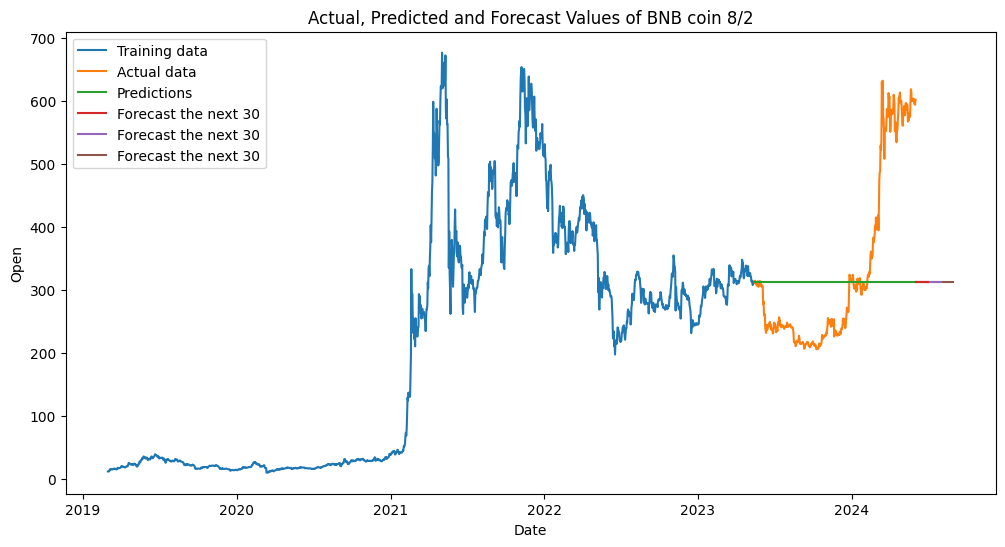

RMSE: 141.8623
MAPE: 30.32%
MSE: 20124.9178


In [54]:
train_df, test_df = split_train_test_data(df, 0.8)
model_df = SimpleExpSmoothing(train_df['Price']).fit(optimized=True)
predictions_df = model_df.forecast(len(test_df))

forecast_df = model_df.forecast(30)
last_date_df = test_df['Date'].iloc[-1]
next_dates_df = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=30)

forecast_df_60 = model_df.forecast(60)
next_dates_df_60 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=60)

forecast_df_90 = model_df.forecast(90)
next_dates_df_90 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Price'], label='Training data')
plt.plot(test_df['Date'], test_df['Price'], label='Actual data')
plt.plot(test_df['Date'], predictions_df, label='Predictions')
plt.plot(next_dates_df, forecast_df, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df_60, forecast_df_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df_90, forecast_df_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of BNB coin 8/2')
plt.legend()
plt.show()

mse_df = mean_squared_error(test_df['Price'], predictions_df)
rmse_df = np.sqrt(mse_df)  # Sửa lỗi tính RMSE
mape_df = mean_absolute_percentage_error(test_df['Price'], predictions_df)

print(f"RMSE: {rmse_df:.4f}")
print(f"MAPE: {mape_df:.2f}%")
print(f"MSE: {mse_df:.4f}")

## 3. BNB Data with 9/1 split 

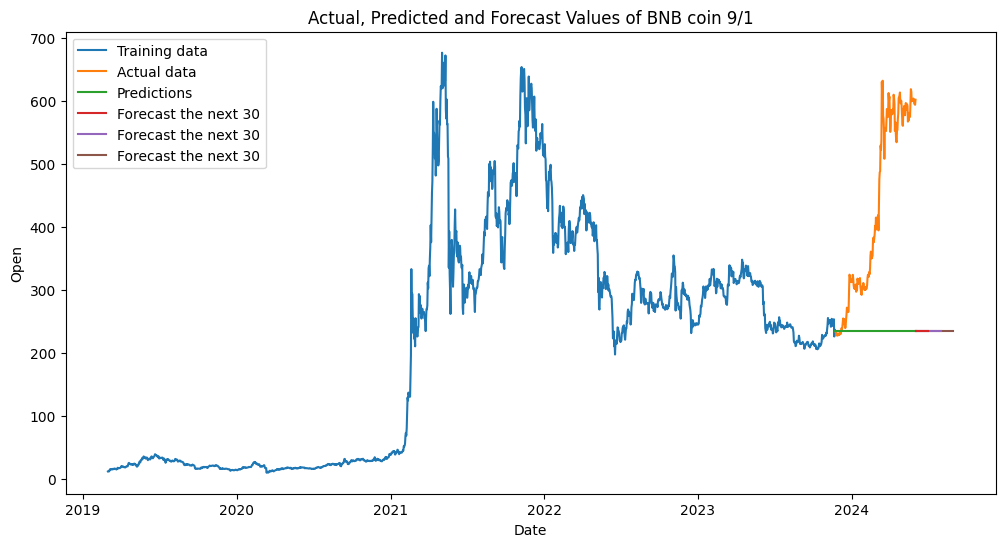

RMSE: 240.6164
MAPE: 38.27%
MSE: 57896.2456


In [55]:
train_df, test_df = split_train_test_data(df, 0.9)
model_df = SimpleExpSmoothing(train_df['Price']).fit(optimized=True)
predictions_df = model_df.forecast(len(test_df))

forecast_df = model_df.forecast(30)
last_date_df = test_df['Date'].iloc[-1]
next_dates_df = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=30)

forecast_df_60 = model_df.forecast(60)
next_dates_df_60 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=60)

forecast_df_90 = model_df.forecast(90)
next_dates_df_90 = pd.date_range(start=last_date_df + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df['Date'], train_df['Price'], label='Training data')
plt.plot(test_df['Date'], test_df['Price'], label='Actual data')
plt.plot(test_df['Date'], predictions_df, label='Predictions')
plt.plot(next_dates_df, forecast_df, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df_60, forecast_df_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df_90, forecast_df_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of BNB coin 9/1')
plt.legend()
plt.show()

mse_df = mean_squared_error(test_df['Price'], predictions_df)
rmse_df = np.sqrt(mse_df)  # Sửa lỗi tính RMSE
mape_df = mean_absolute_percentage_error(test_df['Price'], predictions_df)

print(f"RMSE: {rmse_df:.4f}")
print(f"MAPE: {mape_df:.2f}%")
print(f"MSE: {mse_df:.4f}")

## Load and Process Dogecoin Data 

In [56]:
df2 = pd.read_csv('Dogecoin Historical Data.csv')
df2 = df2.drop(columns=['Vol.', 'Change %'])
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2 = df2.sort_values('Date')
df2 = df2.reset_index(drop=True)

## 4. Dogecoin Data with 7/3 split 

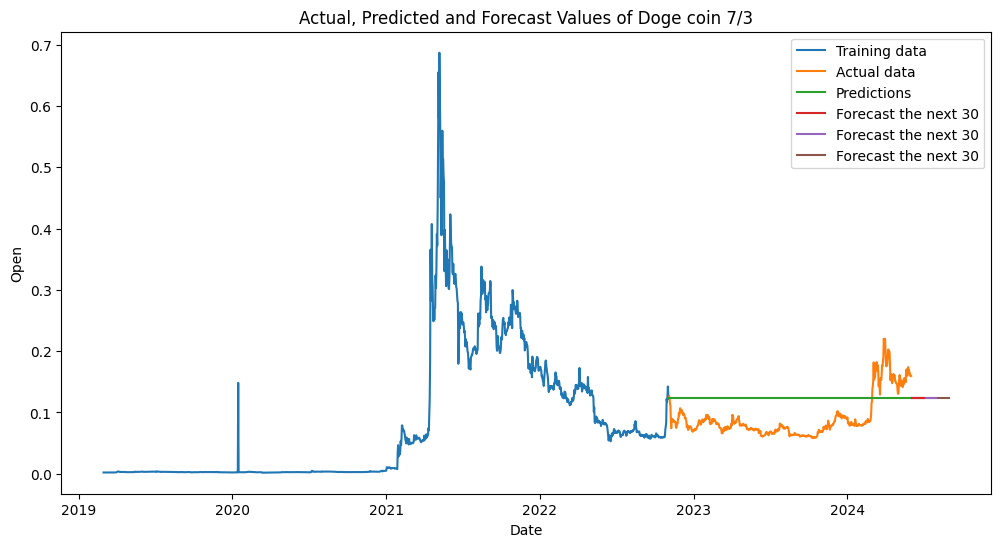

RMSE: 0.0469
MAPE: 56.26%
MSE: 0.0022


In [57]:
train_df2, test_df2 = split_train_test_data(df2, 0.7)
model_df2 = SimpleExpSmoothing(train_df2['Price']).fit(optimized=True)
predictions_df2 = model_df2.forecast(len(test_df2))

forecast_df2 = model_df2.forecast(30)
last_date_df2 = test_df2['Date'].iloc[-1]
next_dates_df2 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=30)

forecast_df2_60 = model_df2.forecast(60)
last_date_df2_60 = test_df2['Date'].iloc[-1]
next_dates_df2_60 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=60)

forecast_df2_90 = model_df2.forecast(90)
last_date_df2_90 = test_df2['Date'].iloc[-1]
next_dates_df2_90 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df2['Date'], train_df2['Price'], label='Training data')
plt.plot(test_df2['Date'], test_df2['Price'], label='Actual data')
plt.plot(test_df2['Date'], predictions_df2, label='Predictions')
plt.plot(next_dates_df2, forecast_df2, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df2_60, forecast_df2_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df2_90, forecast_df2_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of Doge coin 7/3')
plt.legend()
plt.show()

mse_df2 = mean_squared_error(test_df2['Price'], predictions_df2)
rmse_df2 = np.sqrt(mse_df2)  # Sửa lỗi tính RMSE
mape_df2 = mean_absolute_percentage_error(test_df2['Price'], predictions_df2)

print(f"RMSE: {rmse_df2:.4f}")
print(f"MAPE: {mape_df2:.2f}%")
print(f"MSE: {mse_df2:.4f}")

## 5. Dogecoin Data with 8/2 split 

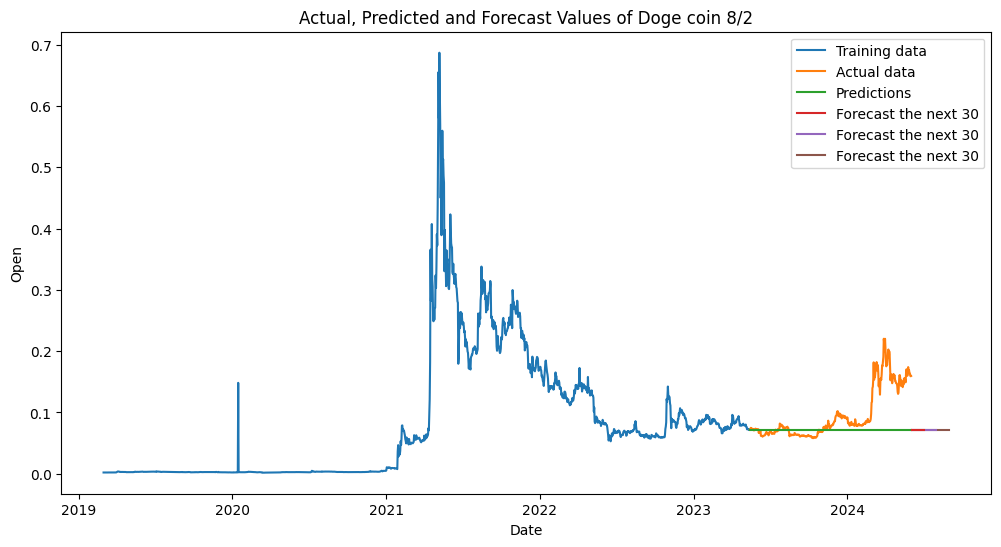

RMSE: 0.0471
MAPE: 22.39%
MSE: 0.0022


In [58]:
train_df2, test_df2 = split_train_test_data(df2, 0.8)
model_df2 = SimpleExpSmoothing(train_df2['Price']).fit(optimized=True)
predictions_df2 = model_df2.forecast(len(test_df2))

forecast_df2 = model_df2.forecast(30)
last_date_df2 = test_df2['Date'].iloc[-1]
next_dates_df2 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=30)

forecast_df2_60 = model_df2.forecast(60)
last_date_df2_60 = test_df2['Date'].iloc[-1]
next_dates_df2_60 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=60)

forecast_df2_90 = model_df2.forecast(90)
last_date_df2_90 = test_df2['Date'].iloc[-1]
next_dates_df2_90 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=90)


plt.figure(figsize=(12, 6))
plt.plot(train_df2['Date'], train_df2['Price'], label='Training data')
plt.plot(test_df2['Date'], test_df2['Price'], label='Actual data')
plt.plot(test_df2['Date'], predictions_df2, label='Predictions')
plt.plot(next_dates_df2, forecast_df2, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df2_60, forecast_df2_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df2_90, forecast_df2_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of Doge coin 8/2')
plt.legend()
plt.show()

mse_df2 = mean_squared_error(test_df2['Price'], predictions_df2)
rmse_df2 = np.sqrt(mse_df2)  # Sửa lỗi tính RMSE
mape_df2 = mean_absolute_percentage_error(test_df2['Price'], predictions_df2)

print(f"RMSE: {rmse_df2:.4f}")
print(f"MAPE: {mape_df2:.2f}%")
print(f"MSE: {mse_df2:.4f}")

## 6. Dogecoin Data with 9/1 split 

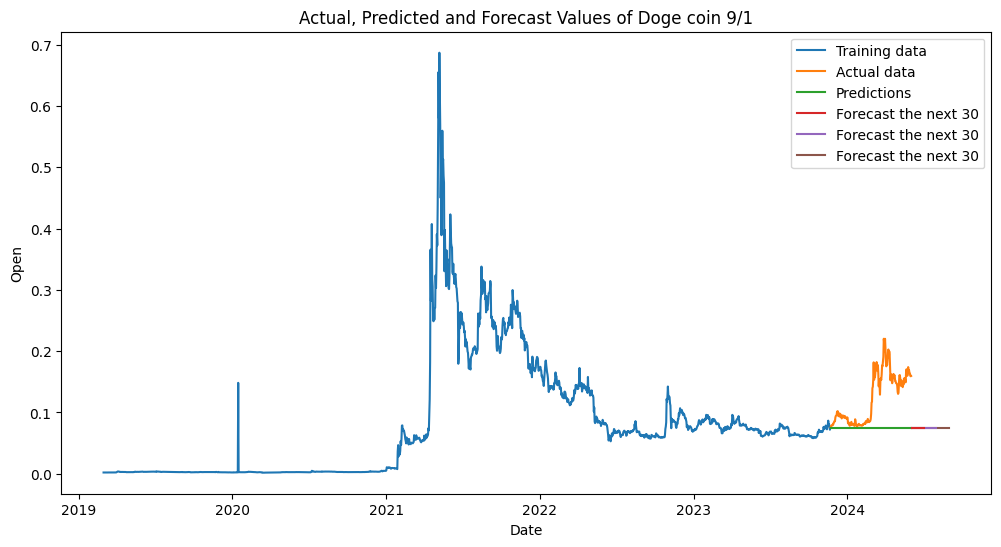

RMSE: 0.0635
MAPE: 32.07%
MSE: 0.0040


In [59]:
train_df2, test_df2 = split_train_test_data(df2, 0.9)
model_df2 = SimpleExpSmoothing(train_df2['Price']).fit(optimized=True)
predictions_df2 = model_df2.forecast(len(test_df2))

forecast_df2 = model_df2.forecast(30)
last_date_df2 = test_df2['Date'].iloc[-1]
next_dates_df2 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=30)

forecast_df2_60 = model_df2.forecast(60)
last_date_df2_60 = test_df2['Date'].iloc[-1]
next_dates_df2_60 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=60)

forecast_df2_90 = model_df2.forecast(90)
last_date_df2_90 = test_df2['Date'].iloc[-1]
next_dates_df2_90 = pd.date_range(start=last_date_df2 + pd.DateOffset(1), periods=90)


plt.figure(figsize=(12, 6))
plt.plot(train_df2['Date'], train_df2['Price'], label='Training data')
plt.plot(test_df2['Date'], test_df2['Price'], label='Actual data')
plt.plot(test_df2['Date'], predictions_df2, label='Predictions')
plt.plot(next_dates_df2, forecast_df2, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df2_60, forecast_df2_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df2_90, forecast_df2_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of Doge coin 9/1')
plt.legend()
plt.show()

mse_df2 = mean_squared_error(test_df2['Price'], predictions_df2)
rmse_df2 = np.sqrt(mse_df2)  # Sửa lỗi tính RMSE
mape_df2 = mean_absolute_percentage_error(test_df2['Price'], predictions_df2)

print(f"RMSE: {rmse_df2:.4f}")
print(f"MAPE: {mape_df2:.2f}%")
print(f"MSE: {mse_df2:.4f}")

## Load and Process TRON Data 

In [60]:
df3 = pd.read_csv('TRON Historical Data.csv')
df3 = df3.drop(columns=['Vol.', 'Change %'])
df3['Date'] = pd.to_datetime(df3['Date'], format='%m/%d/%Y')
df3 = df3.sort_values('Date')
df3 = df3.reset_index(drop=True)

## 7. TRON Data with 7/3 split 

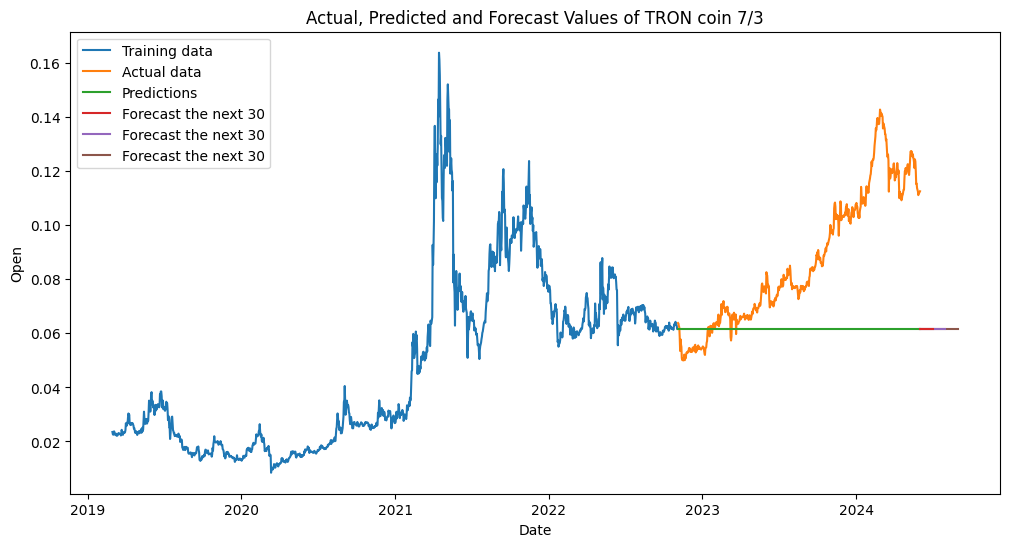

RMSE: 0.0354
MAPE: 26.77%
MSE: 0.0013


In [61]:
train_df3, test_df3 = split_train_test_data(df3, 0.7)
model_df3 = SimpleExpSmoothing(train_df3['Price']).fit(optimized=True)
predictions_df3 = model_df3.forecast(len(test_df3))

forecast_df3 = model_df3.forecast(30)
last_date_df3 = test_df3['Date'].iloc[-1]
next_dates_df3 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=30)

forecast_df3_60 = model_df3.forecast(60)
last_date_df3_60 = test_df3['Date'].iloc[-1]
next_dates_df3_60 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=60)

forecast_df3_90 = model_df3.forecast(90)
last_date_df3_90 = test_df3['Date'].iloc[-1]
next_dates_df3_90 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df3['Date'], train_df3['Price'], label='Training data')
plt.plot(test_df3['Date'], test_df3['Price'], label='Actual data')
plt.plot(test_df3['Date'], predictions_df3, label='Predictions')
plt.plot(next_dates_df3, forecast_df3, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df3_60, forecast_df3_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df3_90, forecast_df3_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of TRON coin 7/3')
plt.legend()
plt.show()

mse_df3 = mean_squared_error(test_df3['Price'], predictions_df3)
rmse_df3 = np.sqrt(mse_df3)  # Sửa lỗi tính RMSE
mape_df3 = mean_absolute_percentage_error(test_df3['Price'], predictions_df3)

print(f"RMSE: {rmse_df3:.4f}")
print(f"MAPE: {mape_df3:.2f}%")
print(f"MSE: {mse_df3:.4f}")

## 8. TRON Data with 8/2 split 

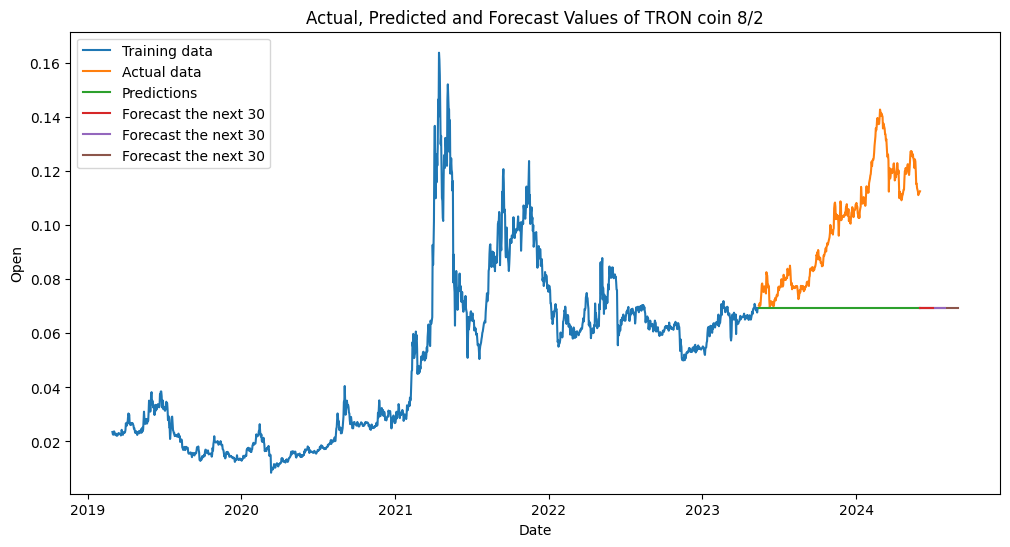

RMSE: 0.0365
MAPE: 27.53%
MSE: 0.0013


In [62]:
train_df3, test_df3 = split_train_test_data(df3, 0.8)
model_df3 = SimpleExpSmoothing(train_df3['Price']).fit(optimized=True)
predictions_df3 = model_df3.forecast(len(test_df3))

forecast_df3 = model_df3.forecast(30)
last_date_df3 = test_df3['Date'].iloc[-1]
next_dates_df3 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=30)

forecast_df3_60 = model_df3.forecast(60)
last_date_df3_60 = test_df3['Date'].iloc[-1]
next_dates_df3_60 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=60)

forecast_df3_90 = model_df3.forecast(90)
last_date_df3_90 = test_df3['Date'].iloc[-1]
next_dates_df3_90 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df3['Date'], train_df3['Price'], label='Training data')
plt.plot(test_df3['Date'], test_df3['Price'], label='Actual data')
plt.plot(test_df3['Date'], predictions_df3, label='Predictions')
plt.plot(next_dates_df3, forecast_df3, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df3_60, forecast_df3_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df3_90, forecast_df3_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of TRON coin 8/2')
plt.legend()
plt.show()

mse_df3 = mean_squared_error(test_df3['Price'], predictions_df3)
rmse_df3 = np.sqrt(mse_df3)  # Sửa lỗi tính RMSE
mape_df3 = mean_absolute_percentage_error(test_df3['Price'], predictions_df3)

print(f"RMSE: {rmse_df3:.4f}")
print(f"MAPE: {mape_df3:.2f}%")
print(f"MSE: {mse_df3:.4f}")

## 9. TRON Data with 9/1 split 

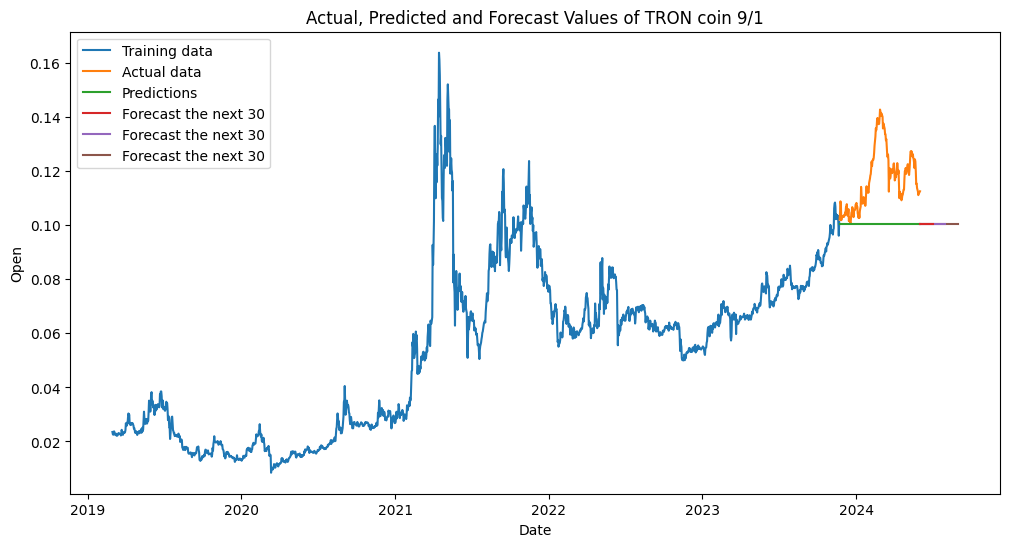

RMSE: 0.0200
MAPE: 13.42%
MSE: 0.0004


In [63]:
train_df3, test_df3 = split_train_test_data(df3, 0.9)
model_df3 = SimpleExpSmoothing(train_df3['Price']).fit(optimized=True)
predictions_df3 = model_df3.forecast(len(test_df3))

forecast_df3 = model_df3.forecast(30)
last_date_df3 = test_df3['Date'].iloc[-1]
next_dates_df3 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=30)

forecast_df3_60 = model_df3.forecast(60)
last_date_df3_60 = test_df3['Date'].iloc[-1]
next_dates_df3_60 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=60)

forecast_df3_90 = model_df3.forecast(90)
last_date_df3_90 = test_df3['Date'].iloc[-1]
next_dates_df3_90 = pd.date_range(start=last_date_df3 + pd.DateOffset(1), periods=90)

plt.figure(figsize=(12, 6))
plt.plot(train_df3['Date'], train_df3['Price'], label='Training data')
plt.plot(test_df3['Date'], test_df3['Price'], label='Actual data')
plt.plot(test_df3['Date'], predictions_df3, label='Predictions')
plt.plot(next_dates_df3, forecast_df3, label='Forecast the next 30', zorder = 3)
plt.plot(next_dates_df3_60, forecast_df3_60, label='Forecast the next 30', zorder = 2)
plt.plot(next_dates_df3_90, forecast_df3_90, label='Forecast the next 30', zorder = 1)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual, Predicted and Forecast Values of TRON coin 9/1')
plt.legend()
plt.show()

mse_df3 = mean_squared_error(test_df3['Price'], predictions_df3)
rmse_df3 = np.sqrt(mse_df3)  # Sửa lỗi tính RMSE
mape_df3 = mean_absolute_percentage_error(test_df3['Price'], predictions_df3)

print(f"RMSE: {rmse_df3:.4f}")
print(f"MAPE: {mape_df3:.2f}%")
print(f"MSE: {mse_df3:.4f}")